In [8]:
import pandas as pd
import numpy as np

In [11]:
# to load the data
df_movies = pd.read_csv('./ml-20m/movies.csv')
df_ratings = pd.read_csv('./ml-20m/ratings.csv')

movieId_to_name = pd.Series(df_movies.title.values,index = df_movies.movieId.values).to_dict()
name_to_movieId = pd.Series(df_movies.movieId.values,index = df_movies.title).to_dict()

# Randomly display 5 records in the dataframe
for df in list((df_movies,df_ratings)):
    rand_idx = np.random.choice(len(df),5,replace=False)
    display(df.iloc[rand_idx,:])
    print("Displaying 5 of the total " + str(len(df)) + "data doints")

,movieId,title,genres
12478,58246,Grace Is Gone (2007),Drama
19569,96917,House at the End of the Street (2012),Horror|Thriller
25872,122851,The Italian Connection (1972),Crime|Drama
2442,2527,Westworld (1973),Action|Sci-Fi|Thriller|Western
15590,79368,"Girasoli, I (Sunflower) (1970)",Drama


Displaying 5 of the total 27278data doints


,userId,movieId,rating,timestamp
13942079,96330,6385,4.0,1120261045
5700555,39214,1441,4.0,1364253154
3951582,26931,265,4.0,974490283
16441684,113822,1957,2.0,1313073870
4429701,30256,5669,0.5,1094855522


Displaying 5 of the total 20000263data doints


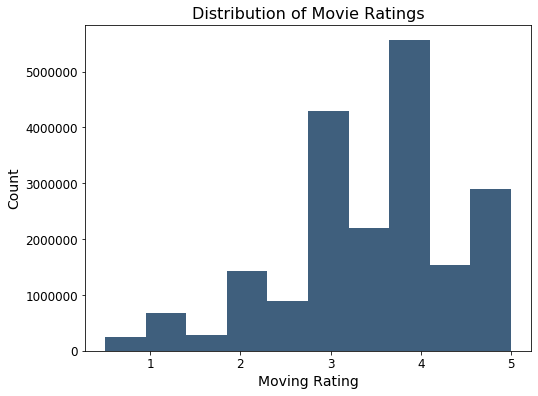

In [16]:
# plot to see the feature of data
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
ax = plt.subplot(111)
ax.set_title("Distribution of Movie Ratings",fontsize=16)
#ax.spines("top").set_visible(False)
#ax.spines("right").set_visible(False)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Moving Rating",fontsize=14)
plt.ylabel("Count",fontsize=14)

plt.hist(df_ratings['rating'],color="#3F5F7D")

plt.show()

In [17]:
from sklearn.model_selection import train_test_split

df_ratings_train,df_ratings_test = train_test_split(df_ratings,
                                                    stratify=df_ratings['userId'],
                                                    random_state = 15688,
                                                    test_size=0.30)

In [18]:
print("Number of training data:" + str(len(df_ratings_train)))
print("Number of test data:" + str(len(df_ratings_test)))

Number of training data:14000184
Number of test data:6000079


In [22]:
def rating_splitter(df):
    df['liked'] = np.where(df['rating']>=4,1,0)
    df['movieId'] = df['movieId'].astype('str')
    gp_user_like = df.groupby(['liked','userId'])
    
    return([gp_user_like.get_group(gp)['movieId'].tolist() for gp in gp_user_like.groups])

In [23]:
#pd.options.mode.chained_assignment = None
splitted_movies = rating_splitter(df_ratings_train)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [24]:
# to train the model with Gensim
import warnings
warnings.filterwarnings(action='ignore',category=UserWarning,module='gensim')

import gensim
assert gensim.models.word2vec.FAST_VERSION > -1

In [25]:
import random

for movie_list in splitted_movies:
    random.shuffle(movie_list)

In [ ]:
from gensim.models import Word2Vec
import datetime
start = datetime.datetime.now()

model = Word2Vec(sentences = splitted_movies,
                iter = 5,
                min_count = 10,
                size = 200,
                workers = 4,
                sg = 1,
                hs = 0,
                negative = 5,
                window = 9999999)
print("Time passed:" + str(datetime.datetime.now()-strat))
model_w2v_sg.save('item2vec_word2vecSg_20190808')
del model_w2v_sg

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

from gensim.models import Word2Vec
model = Word2Vec.load('item2vec_20180327')
word_vectors = model.wv

In [ ]:
# to make recommendations
def refine_search(search_term):
    target_url = "http://www.imdb.com/find?ref_=nv_sr_fn&q="+"+".join(search_term.split())+"&s=tt"
    html = requests.get(target_url).content
    parsed_html = BeautifulSoup(html,'html.parser')
    for tag in parsed_html.find_all('td', class_="result_text"):
        search_result = re.findall('fn_tt_tt_1">(.*)</a>(.*)</td>', str(tag))
        if search_result:
            if search_result[0][0].split()[0]=="The":
                str_frac = " ".join(search_result[0][0].split()[1:])+", "+search_result[0][0].split()[0]
                refined_name = str_frac+" "+search_result[0][1].strip()
            else:
                refined_name = search_result[0][0]+" "+search_result[0][1].strip()
    return refined_name